# Analyzing Selfplay Data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from aegomoku.gomoku_board import GomokuBoard
from aegomoku.game_data import read_training_data
from aegomoku.utils import analyse_example
from pathlib import Path

import os

# The Data

In [4]:
PHASE = '3.2'
HOST = os.uname()[1]
SELFPLAY_DATA=Path('../DATA/selfplay') # / PHASE / HOST
print(os.listdir(SELFPLAY_DATA))

['1800_3_2.pickle', 'new.pickle']


In [5]:
a_pickle = SELFPLAY_DATA / '1800_3_2.pickle'
filename = a_pickle.resolve().as_posix()
filename

'/home/wgiersche/workspace/Project-Ellie/DeepGomoku/DATA/selfplay/1800_3_2.pickle'

In [6]:
examples, games = read_training_data(filename)
len(games), len(examples), len(examples[0]), examples[0][0].shape

(1, 120, 3, (21, 21, 3))

#### Game Info
Player name from `gameplay_params.yaml` and all moves

In [7]:
BOARD_SIZE = 19
board = GomokuBoard(BOARD_SIZE)
for game in games:
    print(f"{game[0]} begins with black")
    print([board.Stone(i) for i in game[1]])

P1800_3.0 begins with black
[L8, J10, M9, K11, N10, K7, L12, K10, K9, H10, L10, J8, L9, L11, J9, I9, N9]


In [13]:
ints = games[0][1]
print(ints)

[220, 180, 202, 162, 184, 238, 144, 181, 200, 178, 182, 218, 201, 163, 199, 198, 203]


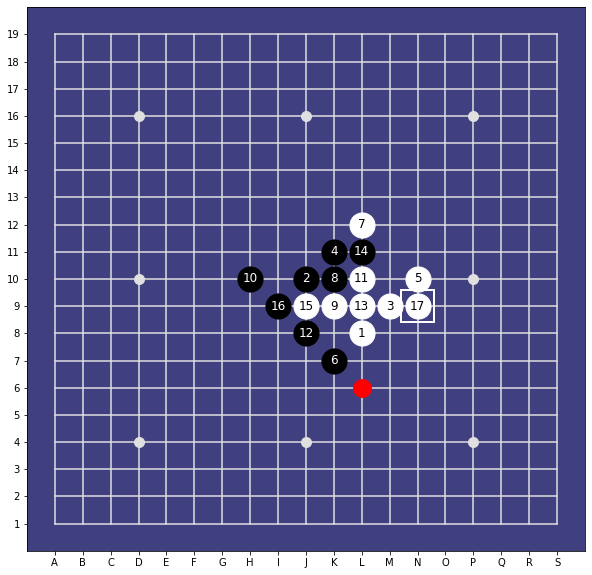

In [16]:
from aegomoku.utils import analyse_board
from aegomoku.policies.topological_value import TopologicalValuePolicy

policy = TopologicalValuePolicy(kappa_s=6, kappa_d=5)

analyse_board(19, ints, policy=policy, disp_width=10)

In [26]:
from aegomoku.tools import string_to_stones
stones = [board.Stone(i) for i in ints]
stones = "".join([str(stone) for stone in stones])
stones

'L8J10M9K11N10K7L12K10K9H10L10J8L9L11J9I9N9'

In [29]:
from cmclient.api.basics import CompManConfig
from cmclient.api.study import StudyHandler
from aegomoku.gomoku_game import ConstantBoardInitializer

config = CompManConfig(board_size=19)
initializer = ConstantBoardInitializer(stones)
ai = "../DATA/models/3_c2.model"
num_simulations = 800
StudyHandler(config, "../cmclient/gui/", initializer, ai, num_simu=num_simulations).handle()


---

## Data Verification
We have records from those games in 8 symmetries. Now we skim through a good chunk of training records to check whether it makes sense (to some degree).

### Compare with the original policy's estimate
The tree search results in less, but more refined options

113
Next to play: BLACK
Value from BLACK's point of view: 0.7000000000000265
Next to play: BLACK
Value from BLACK's point of view: -0.04186558723449707


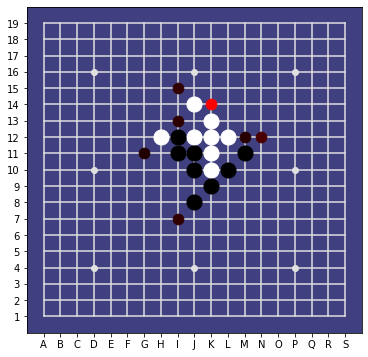

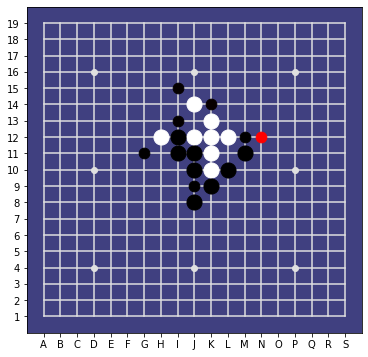

In [20]:
import random
from aegomoku.policies.topological_value import TopologicalValuePolicy

n = random.randint(0, len(examples))
#n = 4688
print(n)
example = examples[n]
analyse_example(example, policy_cutoff=1, disp_width=6)

policy = TopologicalValuePolicy(kappa_s=6, kappa_d=5)
s, _, _ = example
p, v = policy.evaluate(s)
analyse_example((s, p, v), policy_cutoff=1, disp_width=6)

# Policy values explicit on a scale 0-99

In [ ]:
import numpy as np
print((p.reshape((19, 19))*99 / np.max(p)).astype(int))

# Advice is typically a parameterized subset of all probabilities.
Attention: This is a bias trap!

In [ ]:
advisable = policy.get_advisable_actions(s, cut_off=.1, percent_secondary=0, min_secondary=0)
print([board.Stone(i) for i in advisable])